In [1]:
from pathlib import Path
from knee_stress_predict.config import raw_data_dir, processed_data_dir
from knee_stress_predict.objects.KneeGeometry import KneeGeometry
from knee_stress_predict.objects.ComplexFeatureExtracter import plot_curv_subdivisions, \
    add_tib_car_curv, plot_damaged_status_subdivisions, evaluate_cartilage
import numpy as np
import pyvista as pv
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Sophistaicated feature exploration

This notebook extracts and explores new features based on domain expert suggestions, the features described in
[Features](https://github.com/cs481-ekh/f22-ai-cbl/blob/main/docs/new-features-ideas.pdf)

### Data Loading

We did the exploration based on set_2 data of 28 knees since it has a good size so that we can look at each case.

In [2]:
patients_knees = {}
data_set_name = "set_2"
data_dir = Path.joinpath(raw_data_dir, data_set_name)
for i, folder_name in enumerate(os.listdir(data_dir)):
    patient_dir = Path.joinpath(data_dir, folder_name)
    patient_knee = KneeGeometry(patient_dir)
    patients_knees[folder_name] = patient_knee

data_set_name = "set_2"
file_path = Path.joinpath(processed_data_dir, data_set_name, "out_cleaned.csv")
data = pd.read_csv(file_path)

Add simulation length

In [3]:
data["Simulation_len"] = np.where(data['Code'].str.contains("M00"), 0, 12)
data['Simulation_len'] = pd.get_dummies(data['Simulation_len'], drop_first=True)
data.rename(columns={"Simulation_len": "12_month_sim"})

,Unnamed: 0,Code,Femur_PN,Tibia_PN,Femur_volume,Tibia_volume,Femur_Car_volume,Tibia_M_Car_volume,Femur_bounds_x,Tibia_bounds_x,Femur_Car_bounds_x,Femur_Car_bounds_y,Femur_bounds_z,Tibia_bounds_z,Femur_Car_bounds_z,Tibia_L_Car_bounds_z,Max_tib_lat_contact_pressure,Max_tib_med_contact_pressure,12_month_sim
0,0,9905863M00,4011,3009,229006.314467,163757.709784,16928.419729,2255.521204,85.637450,84.724161,81.790594,48.066266,73.671344,70.012669,77.312018,38.669460,20.304403,21.124319,0
1,1,9905863M12,4110,2790,246641.112279,154740.379947,17064.053249,2456.843159,96.285434,86.480400,78.803879,47.016725,72.792441,63.912004,76.198050,39.525092,16.648224,24.434072,1
2,2,9908796M00,2861,2268,141352.763773,106985.460166,14018.290473,2156.549268,75.827375,71.530070,74.469254,41.613434,63.757277,51.757118,66.848989,34.364839,24.156282,32.353172,0
3,3,9908796M12,3022,2171,149215.886238,102911.929577,13813.391488,1961.430990,76.371836,72.717643,73.236664,40.589075,64.151329,51.898573,66.567807,33.854403,26.788031,41.688950,1
4,4,9912946M00,4137,2689,248976.459037,146188.096235,21333.060579,3757.800611,90.441198,86.467486,87.319411,46.886831,70.235115,63.212181,74.647781,53.532299,24.228903,16.497473,0
5,5,9912946M12,4298,2533,258760.708517,133643.463416,20717.925064,3432.820413,90.038145,86.317973,87.437862,46.988974,70.868968,61.794427,74.694045,54.848365,20.500221,16.258379,1
6,6,9954040M00,3417,2512,182608.626657,129043.403109,17714.077397,2903.284614,85.007142,81.918096,82.532087,46.811272,65.060680,57.686642,68.861511,50.400081,21.599136,23.253128,0
7,7,9954040M12,3233,2740,172181.530610,141060.822598,17116.843104,2892.727479,84.540052,82.258822,84.291664,46.083066,65.312921,57.659401,69.320039,50.319550,22.697514,22.974691,1
8,8,9958234M00,3696,2606,208302.746227,137417.336337,21040.724173,3521.339912,87.824182,84.322193,84.643582,45.918056,66.811838,63.803365,71.117317,50.649900,47.319096,18.733936,0
9,9,9958234M12,3674,2669,207124.042497,141823.277426,20793.578831,3585.850947,87.692200,84.865906,84.995334,45.714464,66.978543,65.157606,70.870164,49.449277,33.180820,18.182465,1


## Curvature of medial and lateral cartilages

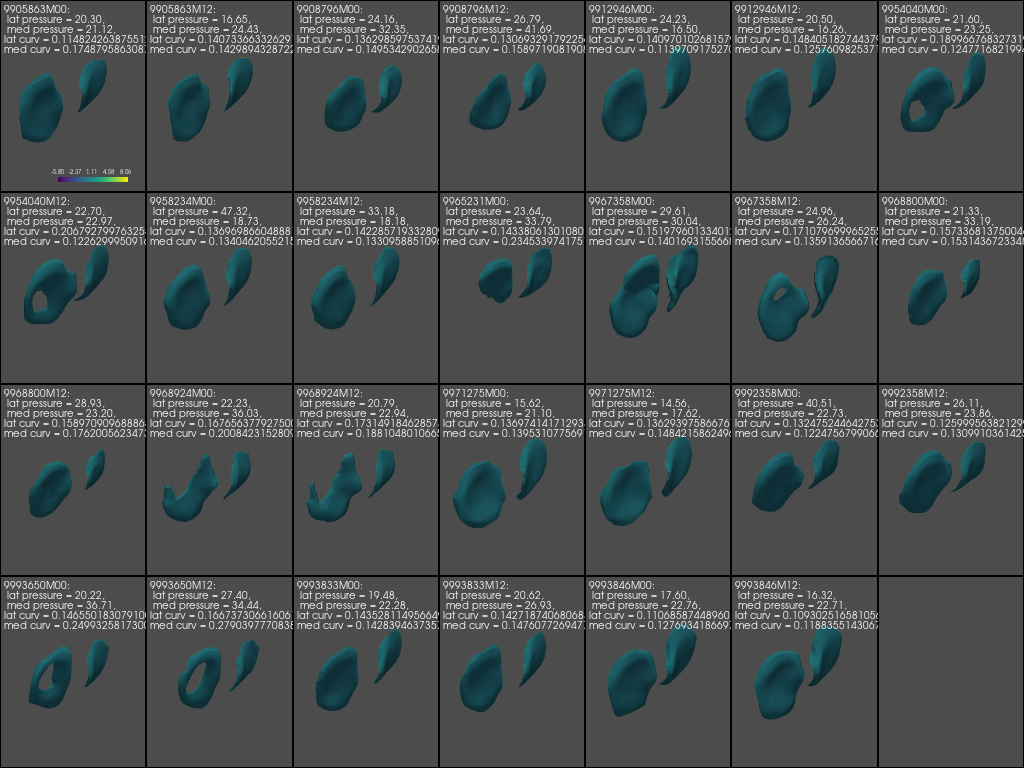

In [4]:
plotter = plot_curv_subdivisions(patients_knees, data)
plotter.show(jupyter_backend="static")

In [5]:
data = add_tib_car_curv(patients_knees, data)

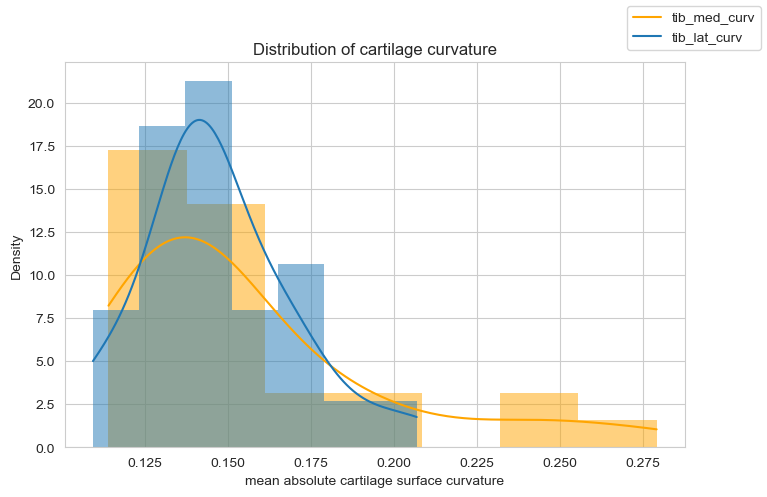

In [6]:
fig = plt.figure(figsize=(8,5))
lst1 = sns.histplot(data['tib_med_curv'], color="orange", kde=True, stat="density", linewidth=0)
lst2 = sns.histplot(data['tib_lat_curv'], kde=True, stat="density", linewidth=0)
fig.legend(labels=['tib_med_curv','tib_lat_curv'])
plt.xlabel('mean absolute cartilage surface curvature')
plt.title('Distribution of cartilage curvature')
plt.show()

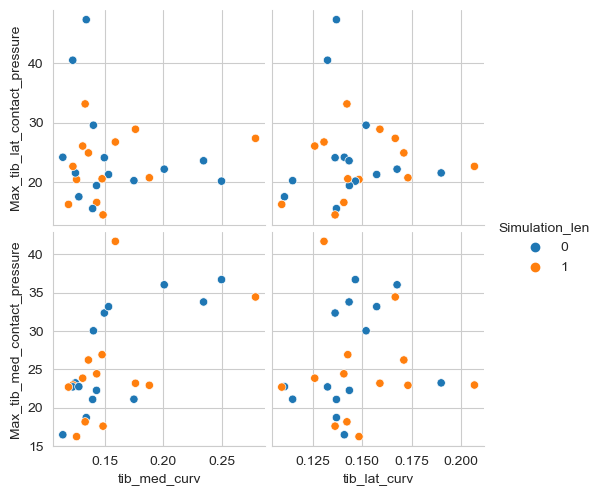

In [7]:
sns.pairplot(
    data,
    x_vars=["tib_med_curv", "tib_lat_curv"],
    y_vars=["Max_tib_lat_contact_pressure", "Max_tib_med_contact_pressure"],
    hue="Simulation_len")

There is some linear relationship between medial tibia cartilage curving and corresponding cartilage contact pressure. Let's check correlations

In [8]:
corr_med, _ = pearsonr(data["tib_med_curv"], data["Max_tib_med_contact_pressure"])
corr_lat, _ = pearsonr(data["tib_lat_curv"], data["Max_tib_lat_contact_pressure"])
print('Pearsons correlation for medial cartilage: %.3f' % corr_med)
print('Pearsons correlation for lateral cartilage: %.3f' % corr_lat)

Pearsons correlation for medial cartilage: 0.622
Pearsons correlation for lateral cartilage: 0.032


## Label cartilage “Healthy” or “Damaged"

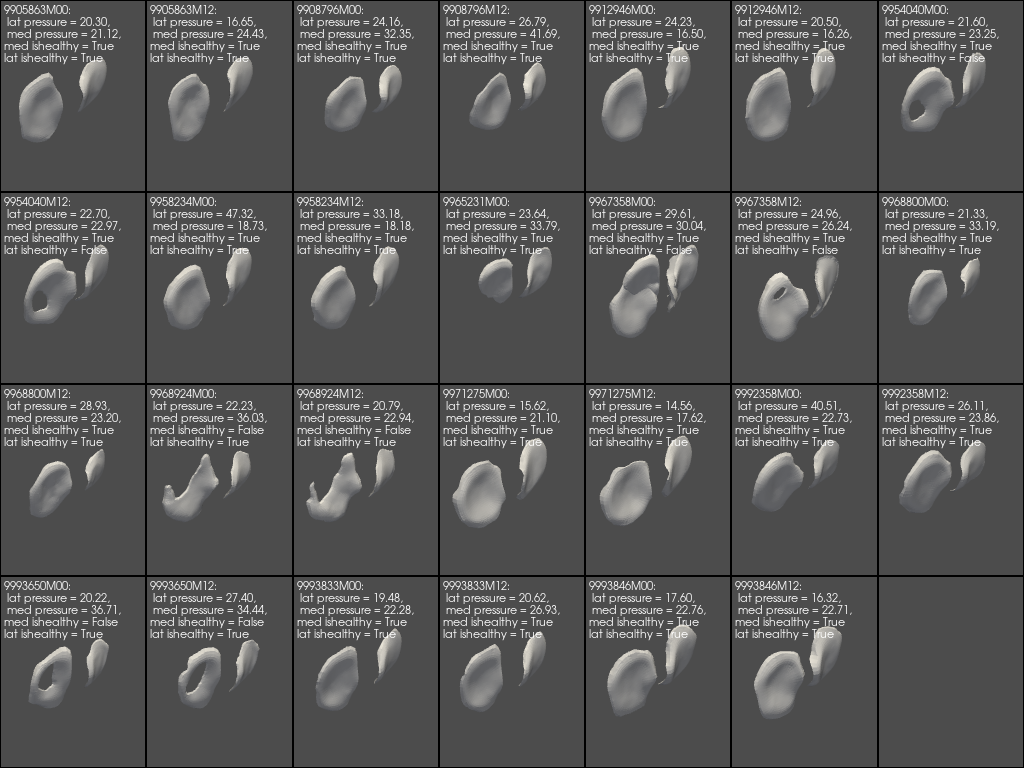

In [9]:
data = evaluate_cartilage(patients_knees, data)
plotter = plot_damaged_status_subdivisions(patients_knees, data)
plotter.show(jupyter_backend="static")

C:\Users\nnina\AppData\Local\Temp\ipykernel_7888\2521053341.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


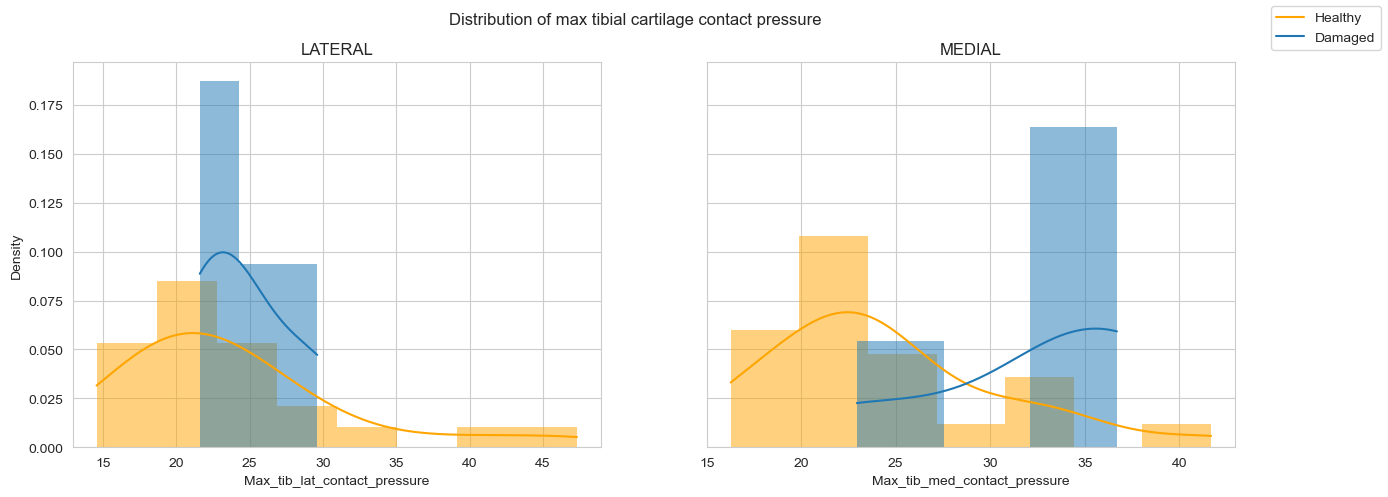

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of max tibial cartilage contact pressure')

# Lateral
sns.histplot(data.loc[data['tib_lat_ishealthy']==True]['Max_tib_lat_contact_pressure'], ax=axes[0], color="orange", kde=True, stat="density", linewidth=0)
sns.histplot(data.loc[data['tib_lat_ishealthy']==False]['Max_tib_lat_contact_pressure'], ax=axes[0], kde=True, stat="density", linewidth=0)
axes[0].set_title('LATERAL')

# Medial
sns.histplot(data.loc[data['tib_med_ishealthy']==True]['Max_tib_med_contact_pressure'], ax=axes[1], color="orange", kde=True, stat="density", linewidth=0)
sns.histplot(data.loc[data['tib_med_ishealthy']==False]['Max_tib_med_contact_pressure'], ax=axes[1], kde=True, stat="density", linewidth=0)
axes[1].set_title('MEDIAL')

fig.legend(labels=['Healthy', 'Damaged'])
fig.show()

I see nothing interesting, but our sample size for set_2 is small. It can be one of the reasons.